In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [4]:
from lv.dnn.dnn_ALL import DNN_ALL

In [13]:
ddp = DNN_ALL(top=128, pdx=[0,1,2], N_test=1000)

In [14]:
ddp.prepare(N_train=10000)

In [40]:
R0="B"
ddp.run_R0(R0, lr=0.01, dp=0.05, ep=10000)

Layers: [128, 64, 32, 16, 3]
| EP 10000 |loss: 0.0375 | mean_: 0.0375 | val_l: 0.0238 | val_m: 0.0238 | lr: 0.0100 | 


In [20]:
R0="B"
ddp.run_R0(R0, lr=0.03, dp=0.1, ep=1000)

Layers: [128, 64, 32, 16, 3]
| EP 1000 |loss: 0.0562 | mean_: 0.0562 | val_l: 0.0261 | val_m: 0.0261 | lr: 0.0030 | 


In [38]:
ddp.pMins["B"]

array([-2.50e+00,  6.75e+03,  2.00e+00])

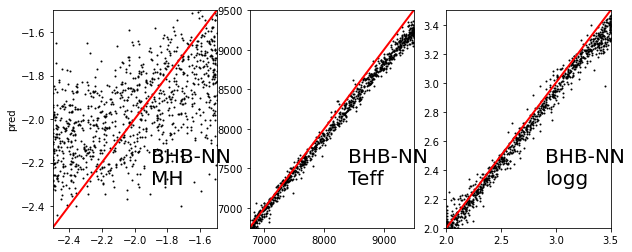

In [48]:
ddp.plot_pred("B")

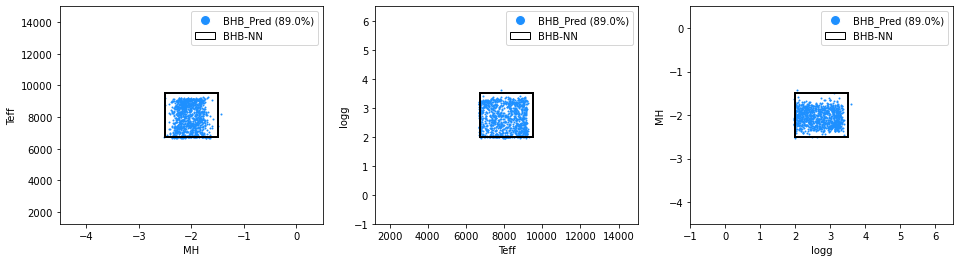

In [25]:
ddp.plot_box_R0_R1("B","B")

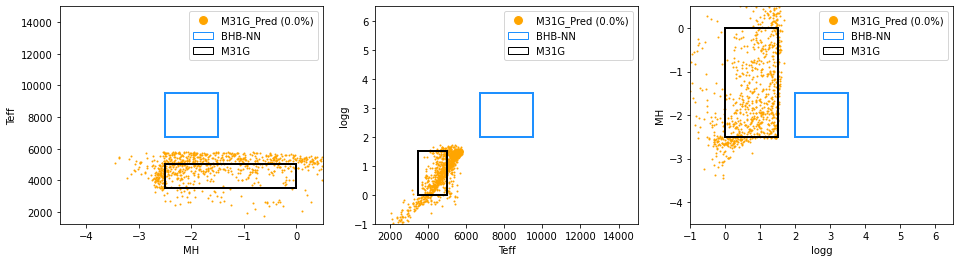

In [52]:
ddp.plot_box_R0_R1("B","M")

In [50]:
ddp.dCT

{'B': {'M': 0.0, 'W': 0.07, 'C': 0.0, 'B': 0.87, 'R': 0.0, 'G': 0.0},
 'M': {'M': 0.919, 'W': 0.0, 'C': 0.755, 'B': 0.0, 'R': 0.001, 'G': 0.841},
 'W': {'M': 0.0, 'W': 0.891, 'C': 0.001, 'B': 0.019, 'R': 0.304, 'G': 0.0},
 'C': {'M': 0.131, 'W': 0.216, 'C': 0.915, 'B': 0.0, 'R': 0.208, 'G': 0.464},
 'R': {'M': 0.0, 'W': 0.226, 'C': 0.001, 'B': 0.022, 'R': 0.874, 'G': 0.0},
 'G': {'M': 0.28, 'W': 0.069, 'C': 0.366, 'B': 0.0, 'R': 0.093, 'G': 0.892}}

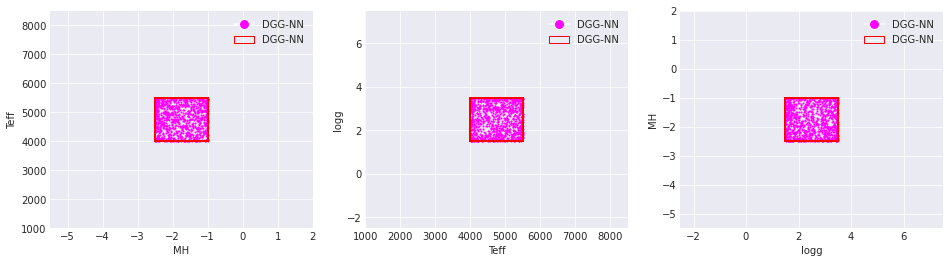

In [58]:
R0="G"
ddp.plot_box_R0_R1(R0,R0, ddp.p_tests[R0])

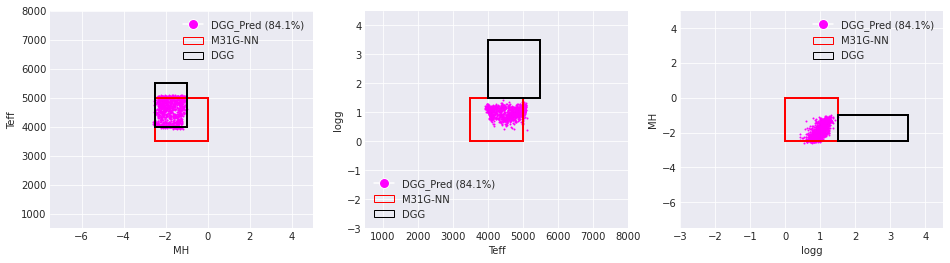

In [61]:
R0="G"
ddp.plot_box_R0_R1("M",R0)

In [62]:
ddp.get_contamination_R0_R1("M", "G")

0.841

In [63]:
p_pred = ddp.p_preds["M"]["G"]

In [64]:
ddp.pMins["M"]

array([-2.5e+00,  3.5e+03,  0.0e+00])

In [ ]:
p_pred > 

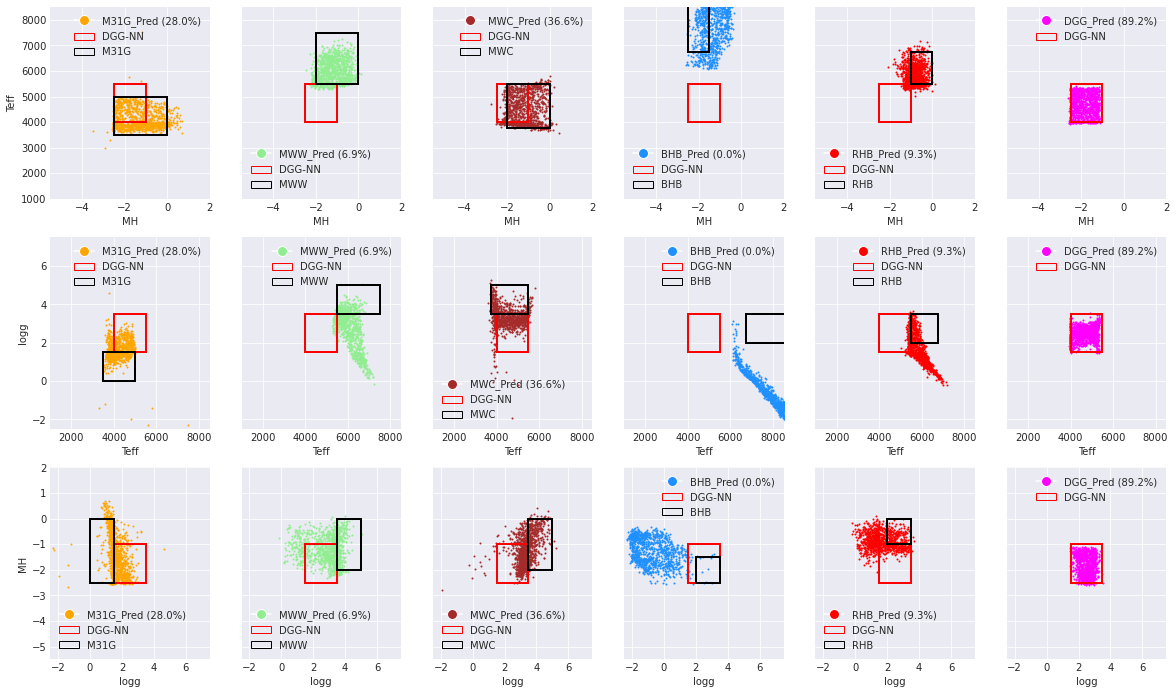

In [65]:
ddp.plot_box_R0(R0, large=0)

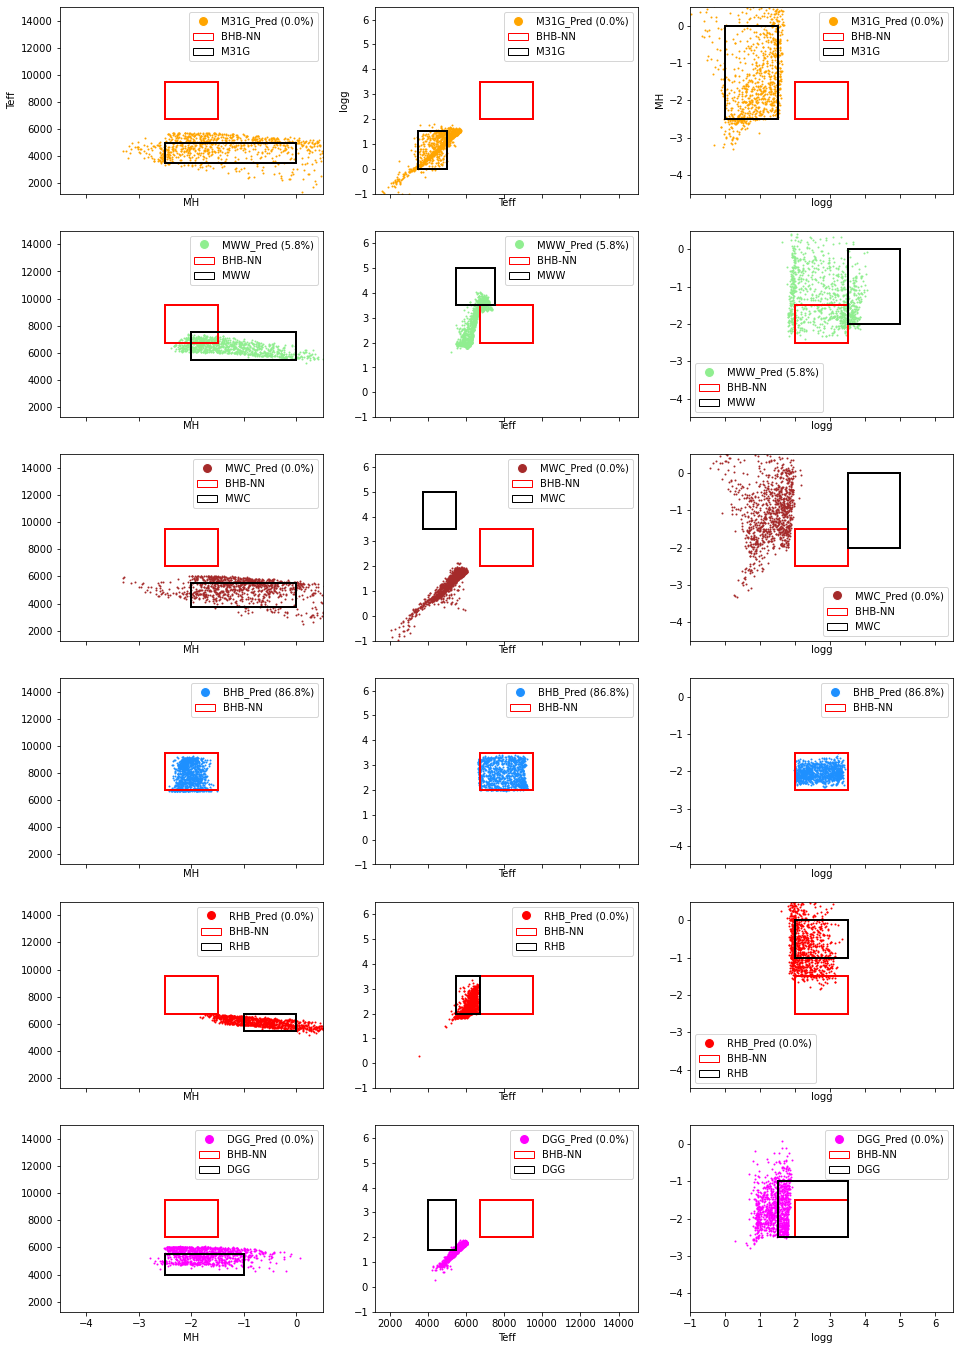

In [43]:
ddp.plot_box_R0(R0, large=1)

In [46]:
ddp.run(lr=0.03, dp=0.1, ep=2000)

Layers: [100, 64, 32, 16, 3]
| EP 2000 |loss: 0.0536 | mean_: 0.0536 | val_l: 0.0186 | val_m: 0.0186 | lr: 0.0300 | 
Layers: [100, 64, 32, 16, 3]
| EP 2000 |loss: 0.0502 | mean_: 0.0502 | val_l: 0.0145 | val_m: 0.0145 | lr: 0.0300 | 
Layers: [100, 64, 32, 16, 3]
| EP 2000 |loss: 0.0506 | mean_: 0.0506 | val_l: 0.0161 | val_m: 0.0161 | lr: 0.0030 | 
Layers: [100, 64, 32, 16, 3]
| EP 2000 |loss: 0.0581 | mean_: 0.0581 | val_l: 0.0269 | val_m: 0.0269 | lr: 0.0300 | 
Layers: [100, 64, 32, 16, 3]
| EP 2000 |loss: 0.0452 | mean_: 0.0452 | val_l: 0.0121 | val_m: 0.0121 | lr: 0.0300 | 
Layers: [100, 64, 32, 16, 3]
| EP 2000 |loss: 0.0562 | mean_: 0.0562 | val_l: 0.0227 | val_m: 0.0227 | lr: 0.0300 | 


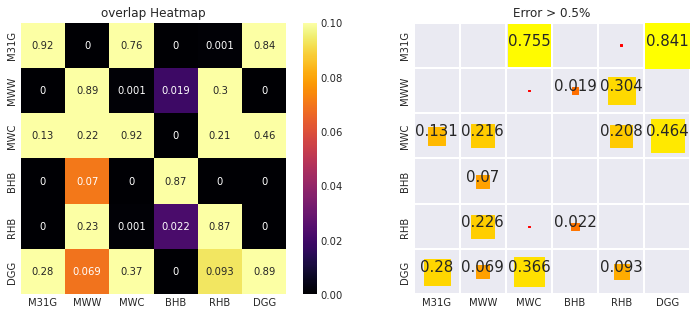

In [67]:
ddp.get_overlap_mat(plot=1)

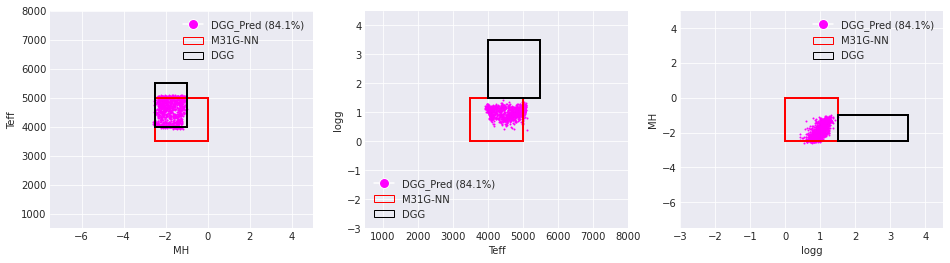

In [49]:
ddp.plot_box_R0_R1("M","G")

In [148]:
SN=10
PATH = f"/scratch/ceph/swei20/data/dnn/BHB/snr{SN}_1k.h5"
with h5py.File(PATH, "r") as f:
    nsflux = f["nsflux_R"][()]
    flux = f["flux_R"][()]

In [149]:
p_pred = ddp.predict_nsflux({"RML":nsflux}, "B", dnn=dnn)

In [150]:
ddp.ns_preds={"B": {}}
ddp.ns_preds["B"] = {"B": p_pred}

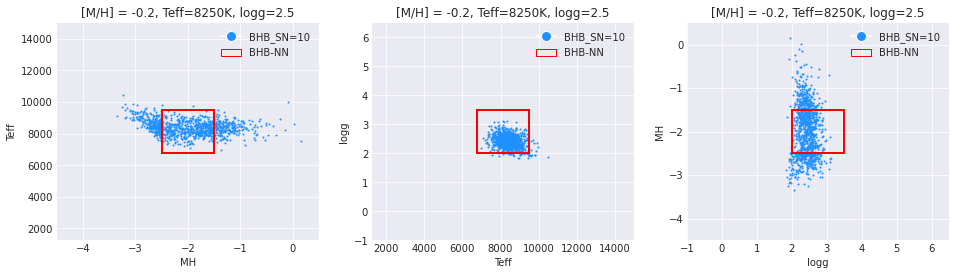

In [151]:

ddp.plot_nsbox_R0_R1("B", "B", SN, Ps=[-0.2, 8250, 2.5])

In [129]:
SN=100
PATH = f"/scratch/ceph/swei20/data/dnn/BHB/snr{SN}_1k.h5"
with h5py.File(PATH, "r") as f:
    nsflux = f["nsflux_R"][()]
    flux = f["flux_R"][()]

In [130]:
p_pred = ddp.predict_nsflux({"RML":nsflux}, "B", dnn=dnn)

In [131]:
p_pred

array([[-2.03895438e+00,  8.28323795e+03,  2.40518598e+00],
       [-1.96781856e+00,  8.23582782e+03,  2.49382615e+00],
       [-1.82410669e+00,  8.30950710e+03,  2.47091401e+00],
       ...,
       [-1.97906435e+00,  8.20973553e+03,  2.46400557e+00],
       [-2.01124737e+00,  8.18802921e+03,  2.47664459e+00],
       [-1.78430700e+00,  8.21739812e+03,  2.44394636e+00]])

In [132]:
ddp.ns_preds={"B": {}}
ddp.ns_preds["B"] = {"B": p_pred}

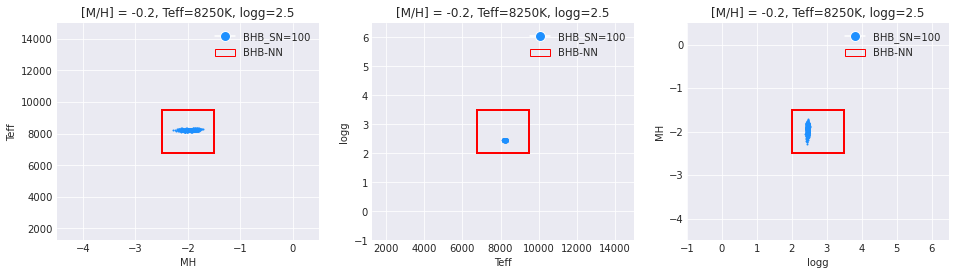

In [133]:

ddp.plot_nsbox_R0_R1("B", "B", SN, Ps=[-0.2, 8250, 2.5])

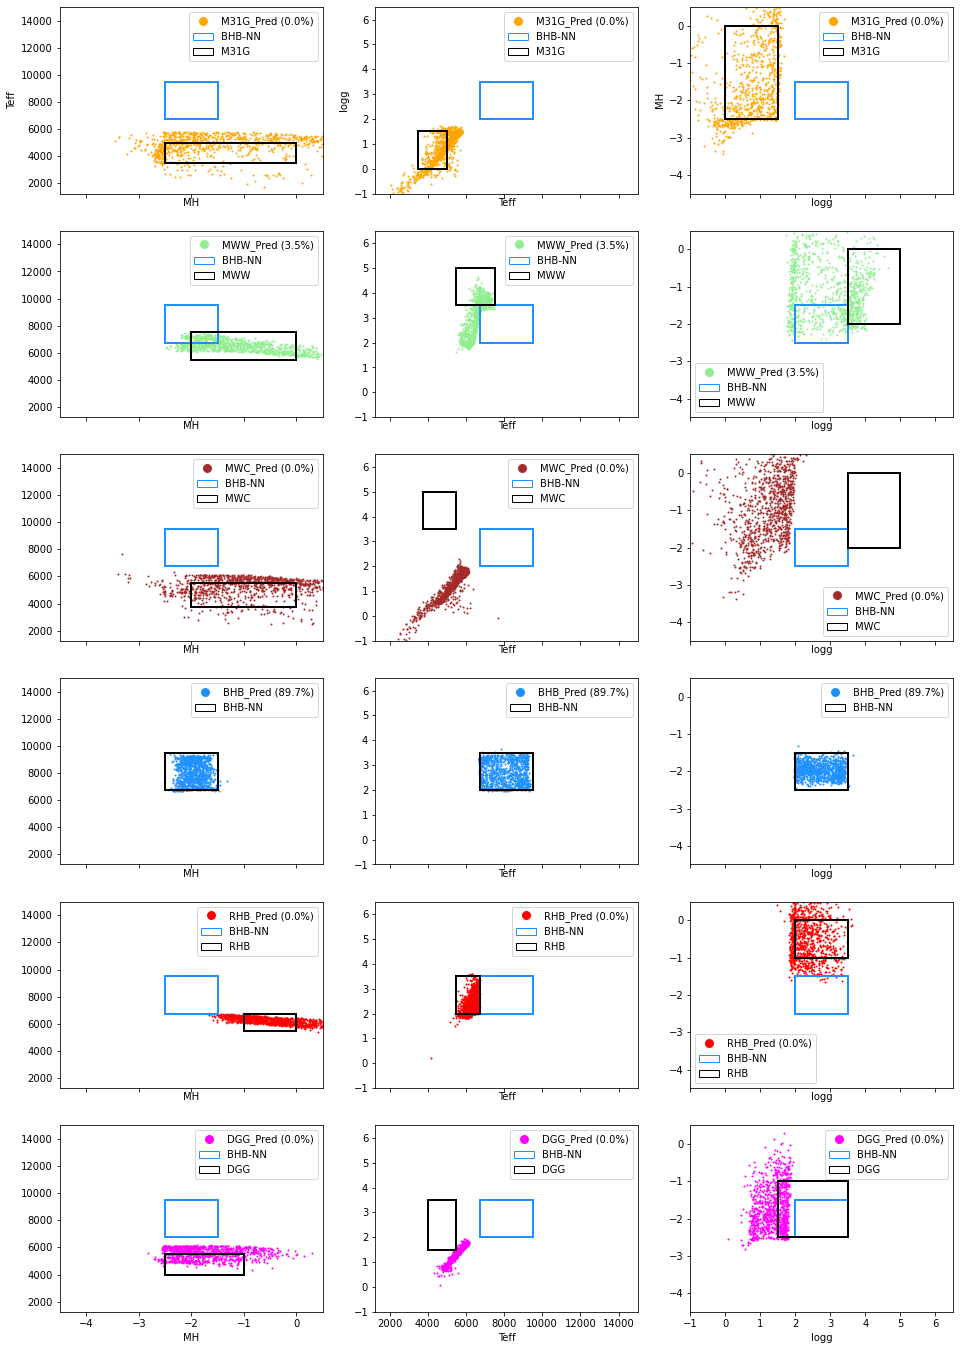

In [49]:
ddp.plot_box_R0("B", large=1)

In [72]:
wave, flux, err, pval, snr = ddp.load_RBF_W_R("RML", "B", 1000)

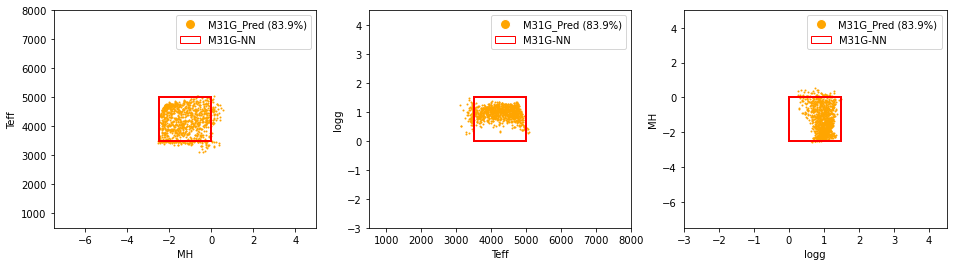

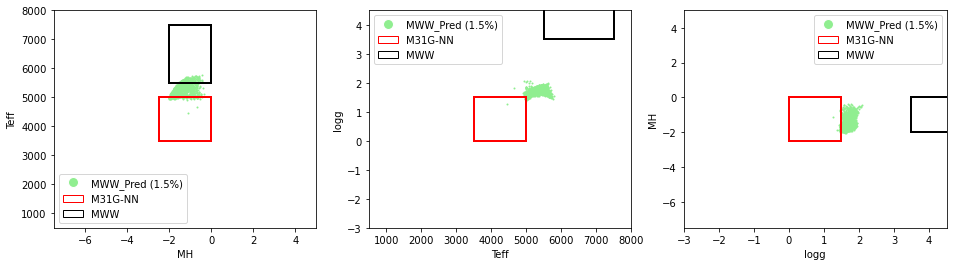

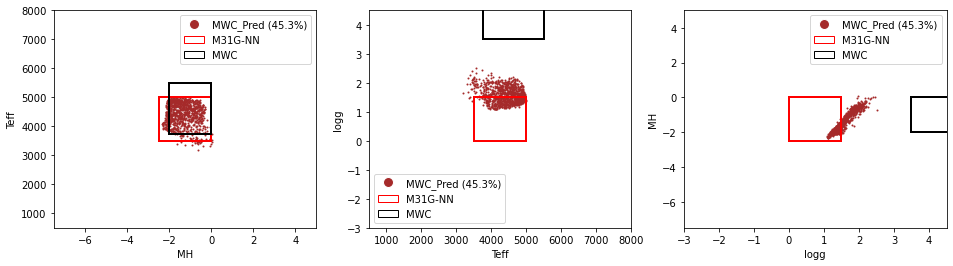

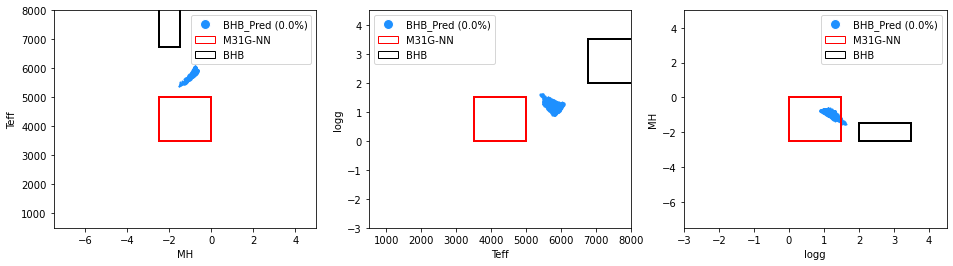

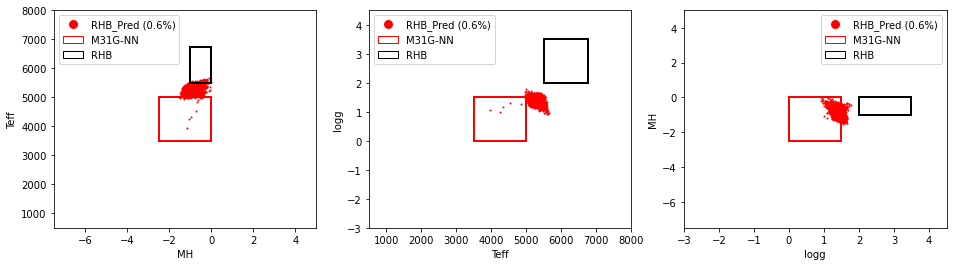

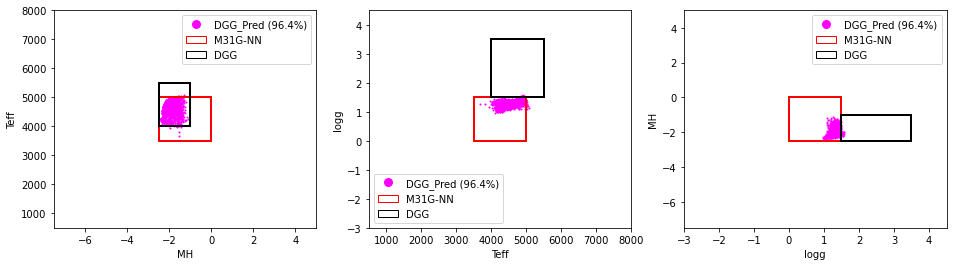

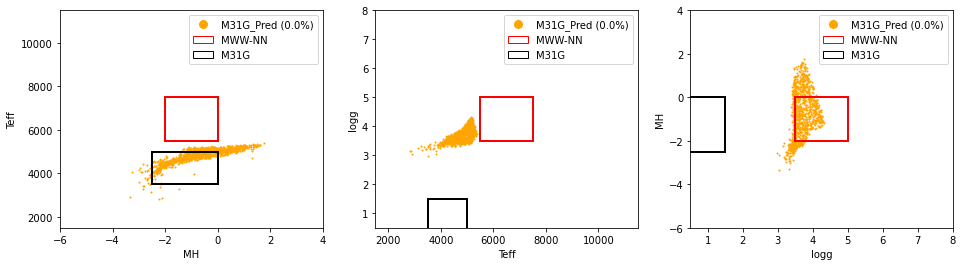

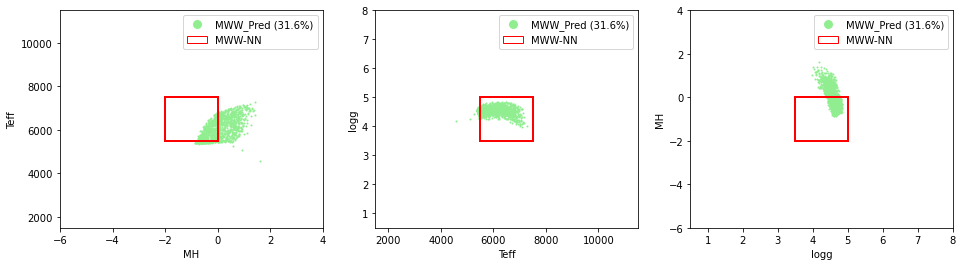

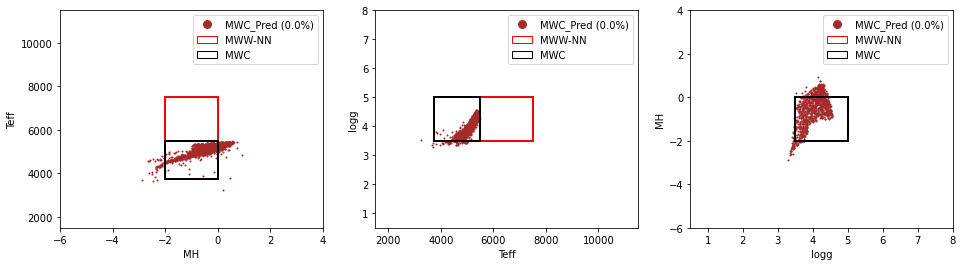

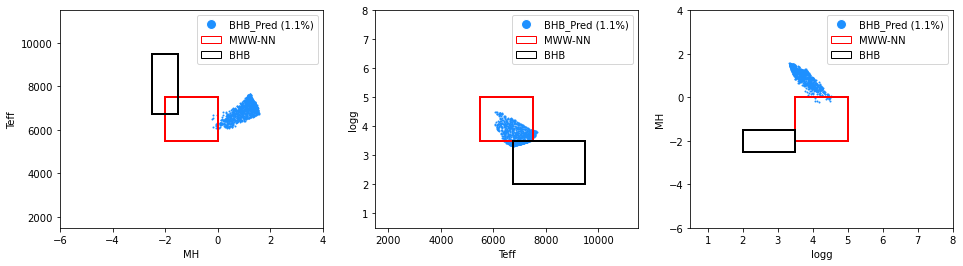

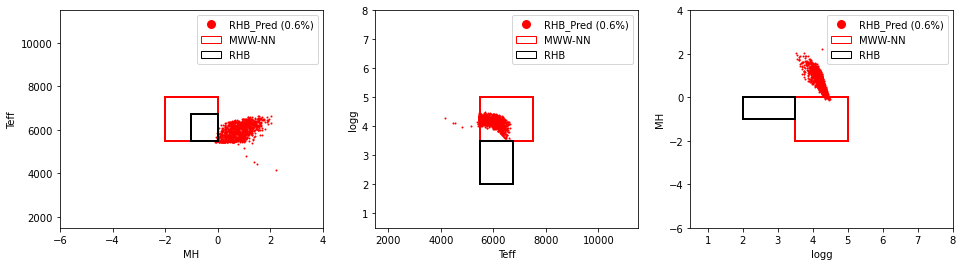

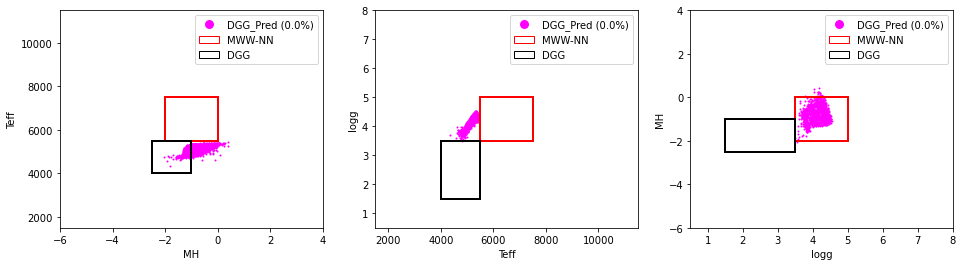

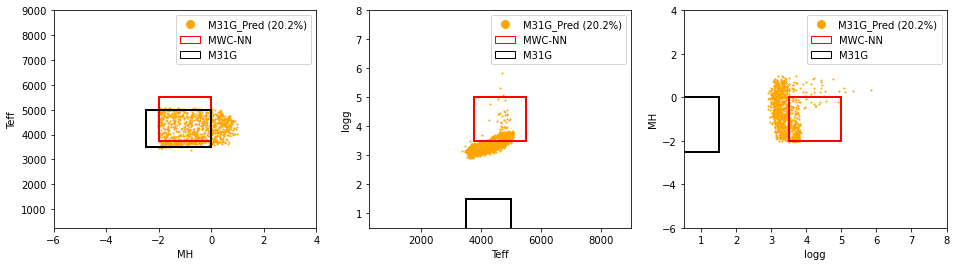

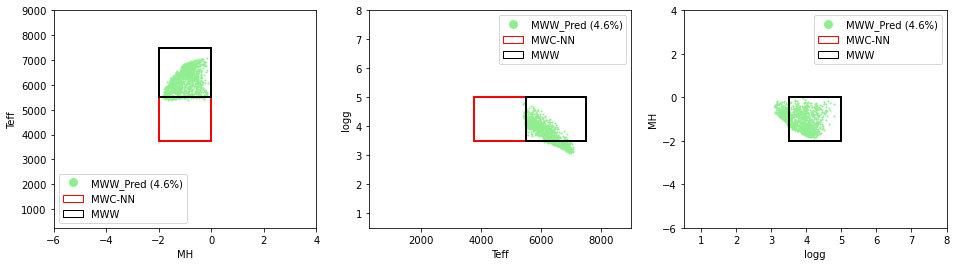

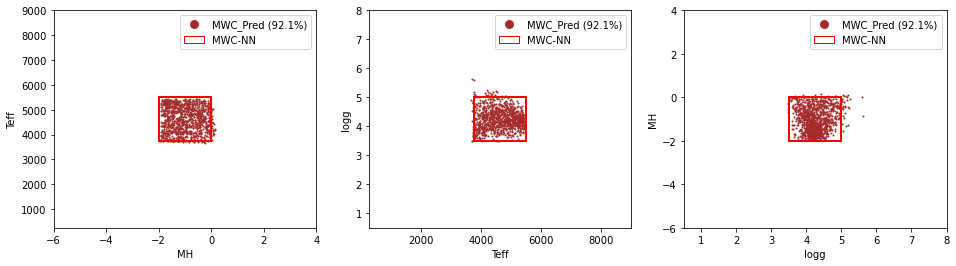

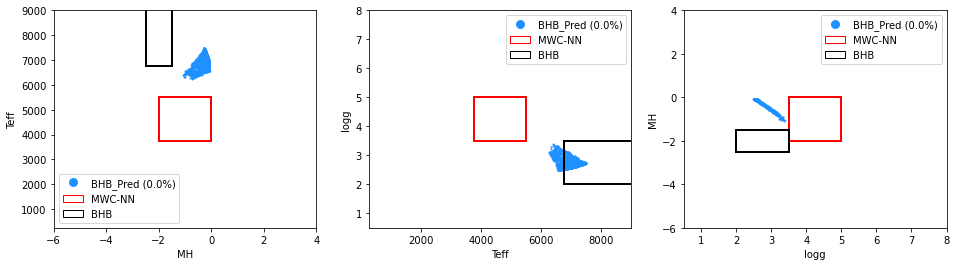

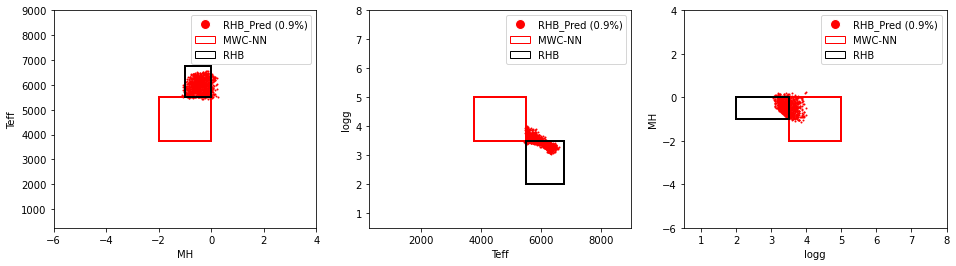

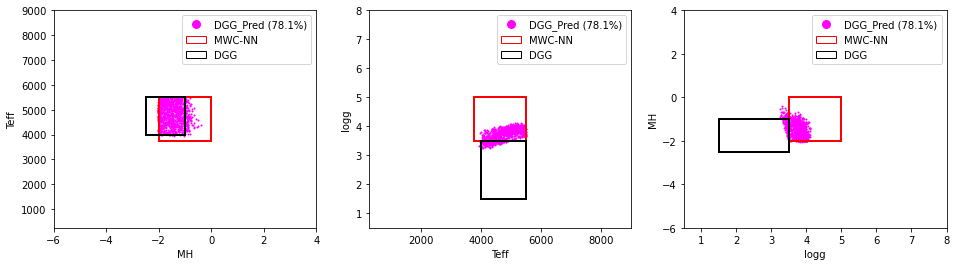

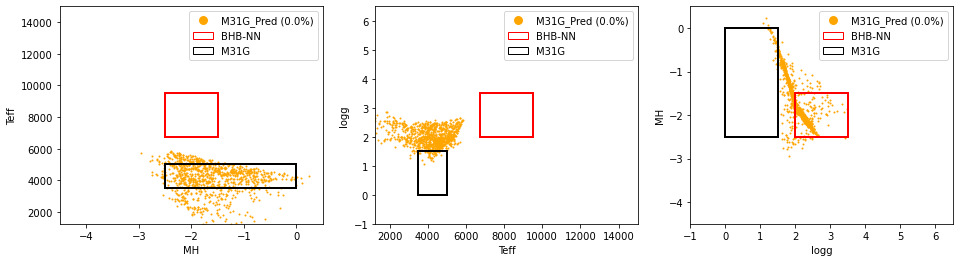

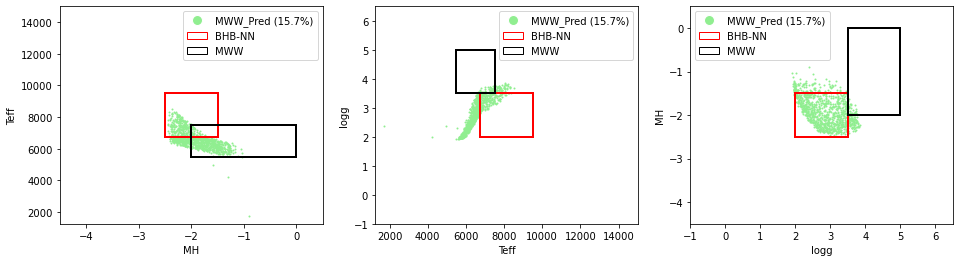

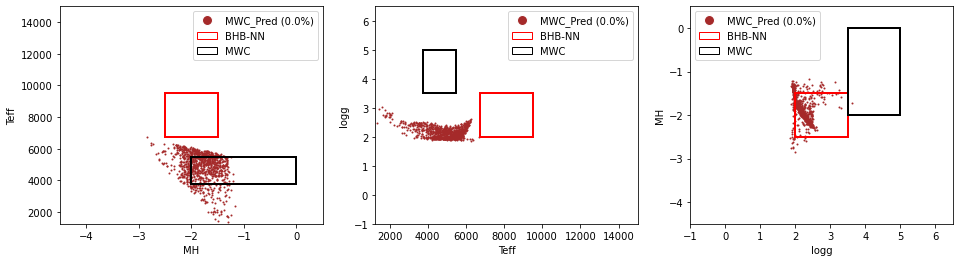

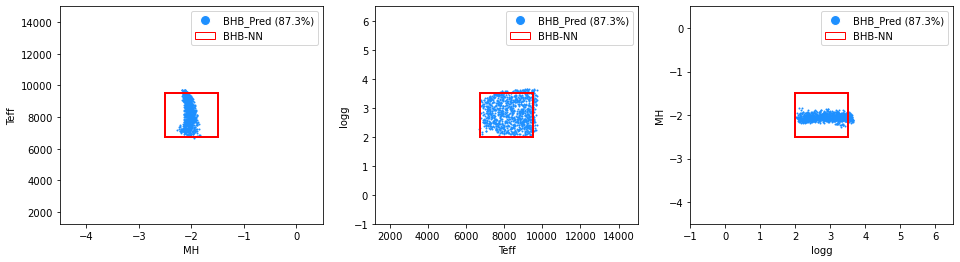

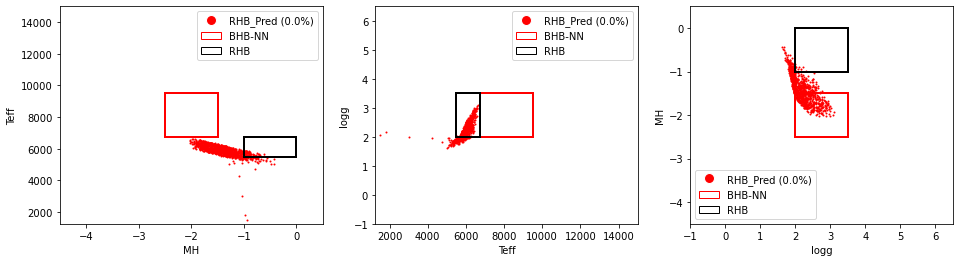

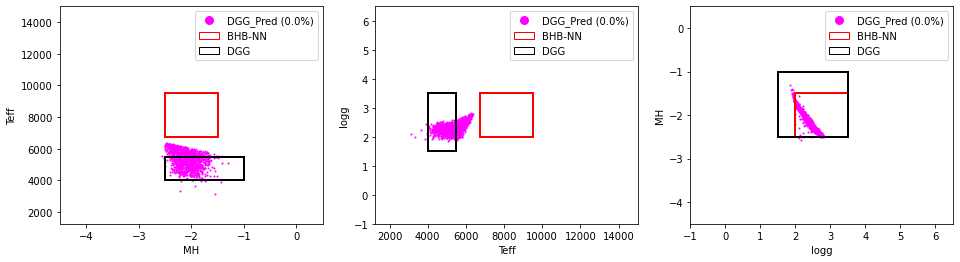

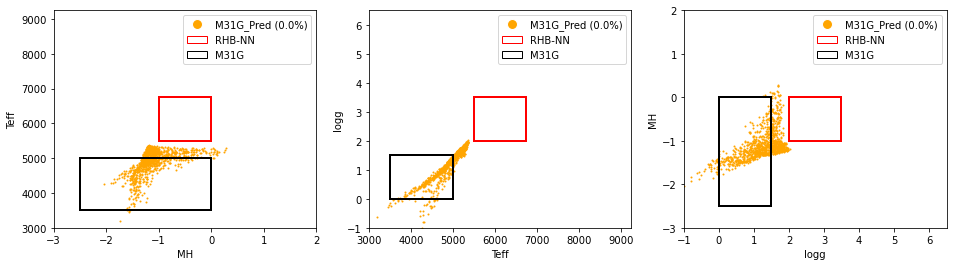

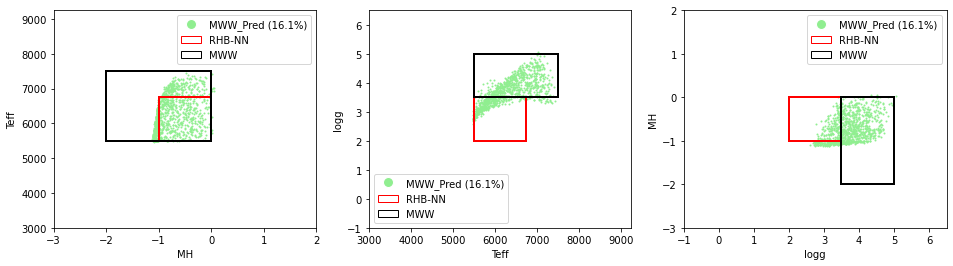

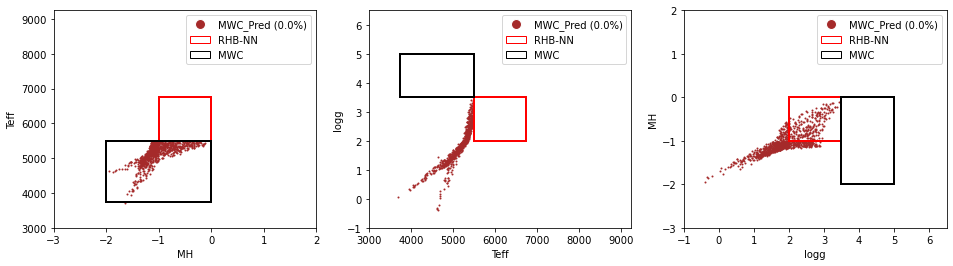

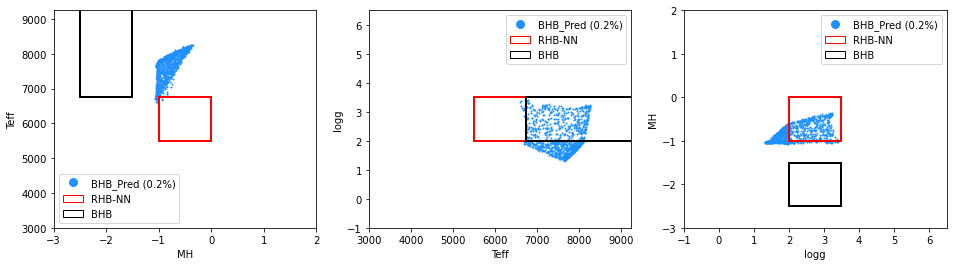

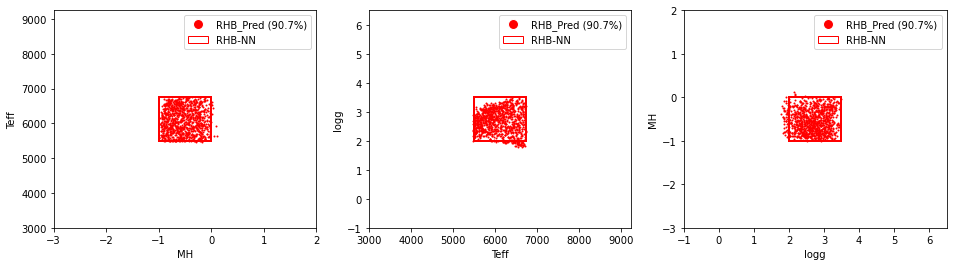

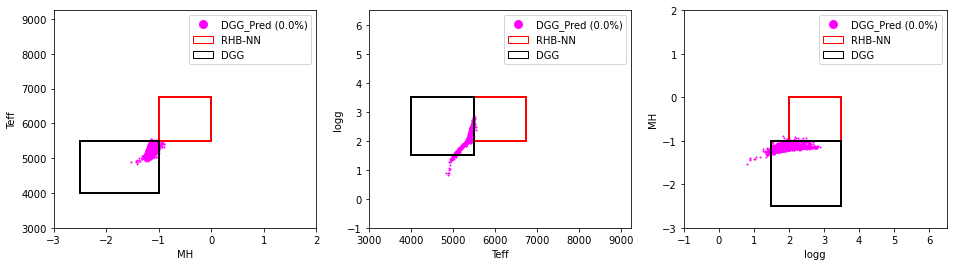

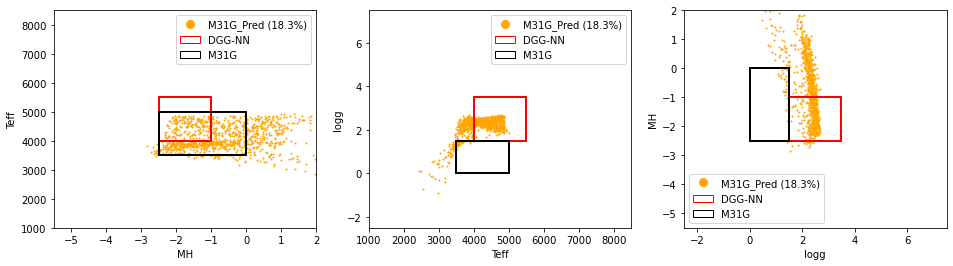

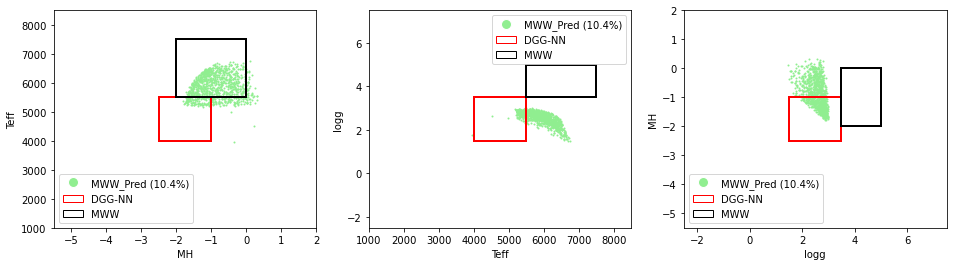

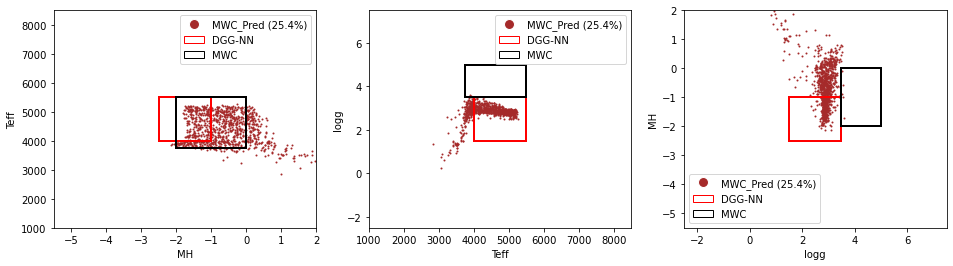

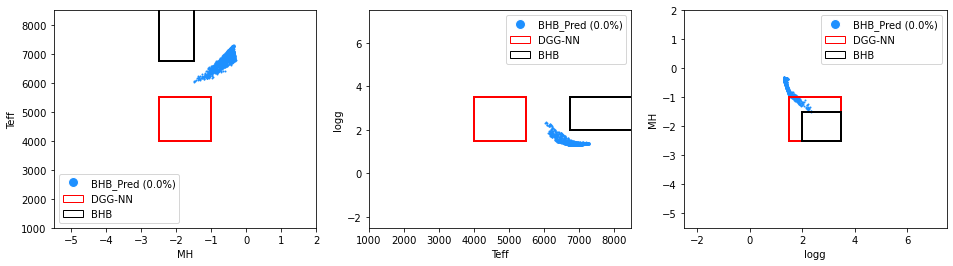

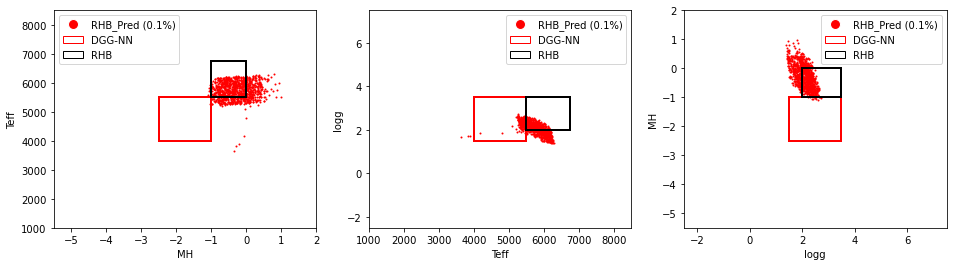

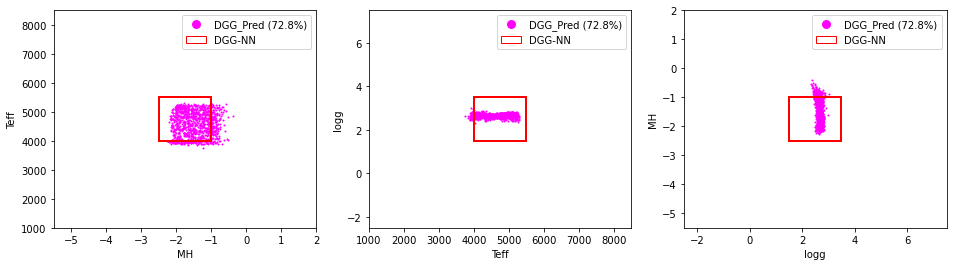

In [77]:
for R0 in ddp.Rnms:
    for R1 in ddp.Rnms:
        ddp.plot_box_R0_R1(R0, R1, n_box=2, axs=None) 

In [104]:
np.min(snr)

27.66242671841118

In [109]:
np.argmin(abs(snr - 30))

95

In [133]:
def plot_SN(SNval=30, W="RML", R="B", rate=1):
    nsdx = np.argmin(abs(snr - SNval))
    Ps = pval[nsdx]
    nsfluxs = ddp.add_noise_N(flux[nsdx], err[nsdx], 1000, rate=rate)
    p_pred = ddp.trans_predict(nsfluxs, W, R)
    ddp.ns_preds={R: {}}
    ddp.ns_preds[R] = {R: p_pred}
    if rate == 1: 
        SN = snr[nsdx]
    else:
        SN = ddp.get_snr(nsfluxs)
    ddp.plot_box_R0_R1(R, R, SN=np.around(SN), Ps=Ps, n_box=0.5)

In [130]:
SNval=30
rate=2
nsdx = np.argmin(abs(snr - SNval))
Ps = pval[nsdx]
nsfluxs = ddp.add_noise_N(flux[nsdx], err[nsdx], 1000, rate=rate)


In [ ]:
err

In [127]:
ddp.get_snr(nsfluxs[0])

not list


62.69041541856068

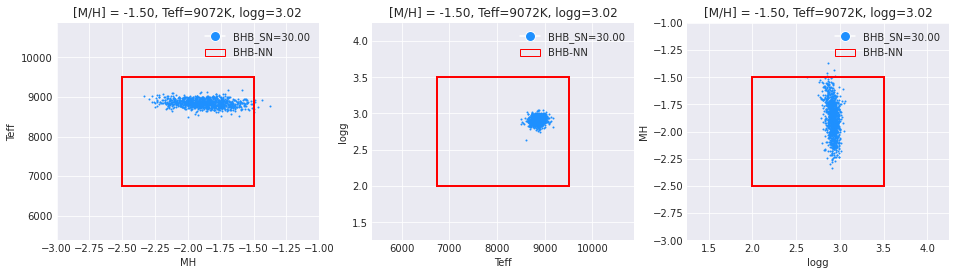

In [134]:
plot_SN(rate=1.)

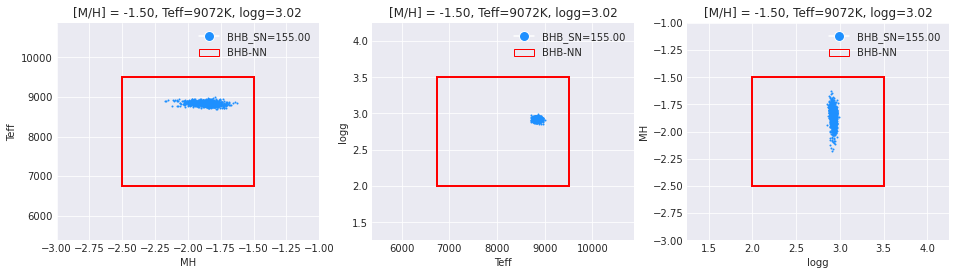

In [136]:
plot_SN(rate=0.5)

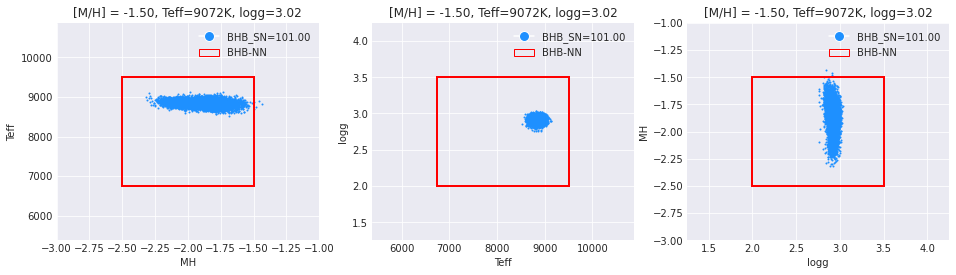

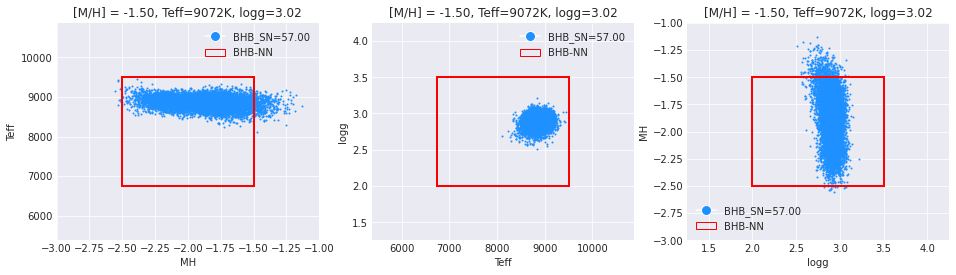

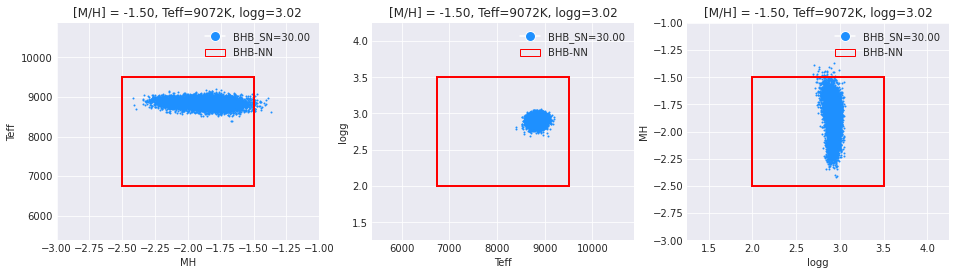

In [118]:
for r in [ 0.8,1.5, 1]:
    plot_SN(rate=r) 

generate noise model for new box

dose snr work for R5000

take 1 model from region and add noise
error projection. snr = 10 * sqrt(2), Bosz_R5000, 30, 60

In [ ]:
sqrt(20)

snr at original /observed spec.

In [51]:
ddp.get_overlap_mat()

KeyError: 'M'

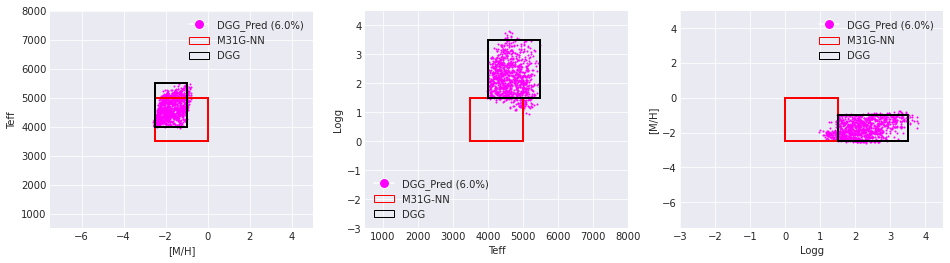

In [242]:
R0, R1 = "M", "G"
ddp.plot_box_R0_R1(R0, R1, n_box=2, axs=None)